## Final Project Submission

Please fill out:
* Student name: Joshua Ooko
* Student pace: self paced / part time / full time
* Scheduled project review date/time: fulltime
* Instructor name:Mark Tiba 
* Blog post URL:


## Business Understanding:
Homeowners often contemplate undertaking renovations to increase the value of their homes before selling or to improve their overall living experience. However, they face challenges in determining which renovations will yield the highest return on investment (ROI) and the potential increase in their property's estimated value.

To address this problem, a data-driven approach can be implemented to provide homeowners with valuable insights and advice regarding home renovations. By analyzing historical home sales data, local market trends, and renovation information, homeowners can make informed decisions about the types of renovations that are likely to have a positive impact on their property's value and estimate the approximate monetary increment associated with each renovation.

The key objectives of this project are as follows:

Develop a predictive model or advisory system that utilizes the provided dataset to suggest specific renovations and estimate the potential increase in home value.
Provide homeowners with accurate and actionable recommendations on which renovations are most likely to yield a higher ROI based on historical data and market trends.
Enhance homeowners' confidence and decision-making process by offering transparent and data-backed information about the estimated value increment resulting from different renovations.
Assist homeowners in aligning their renovation choices with their financial goals, whether it is maximizing profits during a sale or improving the overall value and livability of their homes.
By addressing these objectives, the real estate agency can position itself as a trusted advisor to homeowners, providing them with valuable guidance on home renovations that will not only increase the estimated value of their properties but also meet their individual needs and preferences. This solution can enhance customer satisfaction, promote transparency, and establish the agency as a reliable resource in the real estate market.








## Data Understanding:

The dataset used for this project is the King County House Sales dataset, available in the kc_house_data.csv file. The dataset contains various features related to house sales in King County, including information about the property's physical characteristics, location, and sale price. Here is a brief description of some of the relevant columns:

price: The sale price of the house (target variable).
bedrooms: The number of bedrooms in the house.
bathrooms: The number of bathrooms in the house.
sqft_living: The total living area in square feet.
floors: The number of floors in the house.
waterfront: A binary indicator (0 or 1) representing whether the property has a waterfront view.
condition: A rating of the overall condition of the house.
grade: A rating of the overall grade given to the house based on King County grading system.
The dataset provides valuable information for our project as it includes both the features related to the physical characteristics of the house (e.g., bedrooms, bathrooms, living area) and contextual information such as the waterfront indicator, condition, and grade. This information is useful in understanding how these factors may influence the value of a property.

Although some columns such as date, view, sqft_above, sqft_basement, yr_renovated, zipcode, lat, long, sqft_living15, and sqft_lot15 are suggested to be ignored, we will analyze the remaining features to build our regression models. These features contain essential information that is suitable for our project goals.

By utilizing linear regression modeling techniques, we can establish relationships between the independent variables (features) and the dependent variable (sale price) to estimate the impact of different factors on a property's value. The iterative approach to modeling will allow us to refine our models and assess their performance, ensuring that our findings provide meaningful insights to support recommendations for homeowner

In [23]:
import numpy as np
import pandas as pd

data_path = 'kc_house_data.csv'
df = pd.read_csv(data_path)

In [24]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd

# Load the raw data from the provided CSV file
data = pd.read_csv('kc_house_data.csv')

# Print the first few rows of the data to verify the loading
print(data.head())


           id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.2

## Data Preparation

In [25]:

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [26]:
# Check for missing values in the dataset
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Checking for missing values after handling
print("\nMissing Values after Handling:")
print(df_cleaned.isnull().sum())


Missing Values after Handling:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Addressing outliers using z-score method

In [28]:
from scipy import stats
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_cleaned = df_cleaned.dropna()
z_scores = stats.zscore(df_cleaned[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_cleaned = df_cleaned[filtered_entries]

# Data Analysis

## Regression Modeling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into features (X) and target variable (y)
X = df[numeric_columns[1:]]
y = df[numeric_columns[0]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Regression Model Evaluation:
Mean Squared Error: 65185818516.93
R-squared: 0.50


In [30]:

# Iterated Regression Models

## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Creating and fitting the Ridge Regression model
ridge_model = Ridge(alpha=0.5)  # You can adjust the value of alpha
ridge_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = ridge_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge Regression Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Ridge Regression Evaluation:
Mean Squared Error: 65185349941.75
R-squared: 0.50


## Model 2: Multiple Linear Regression

In [32]:
# Selecting features and target variable
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model2.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel 2: Multiple Linear Regression")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Model 2: Multiple Linear Regression
Mean Squared Error: 65185818516.93
R-squared: 0.50


## Model 3: Simple Linear Regression

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = df[['sqft_living']]
y = df['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model1.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model 1: Simple Linear Regression")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model 1: Simple Linear Regression
Mean Squared Error: 65977373783.62
R-squared: 0.49


# Data Visualization

## Line Plot

Text(0, 0.5, 'Average Price')

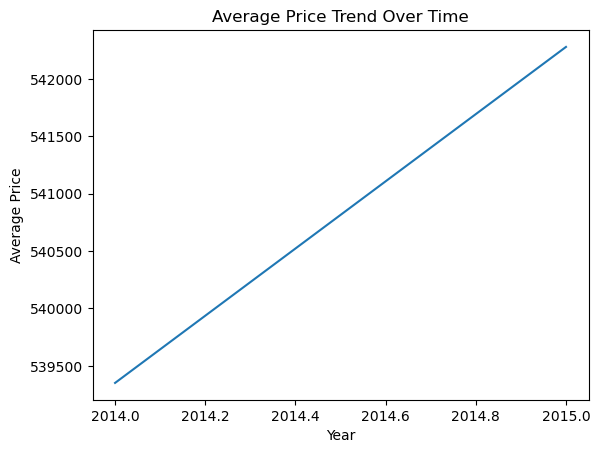

In [35]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by year and calculate the average price
average_price_by_year = df.groupby(df['date'].dt.year)['price'].mean()

# Generate the line plot
plt.plot(average_price_by_year.index, average_price_by_year.values)

# Set the title and axis labels
plt.title('Average Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')

## Bar Plot

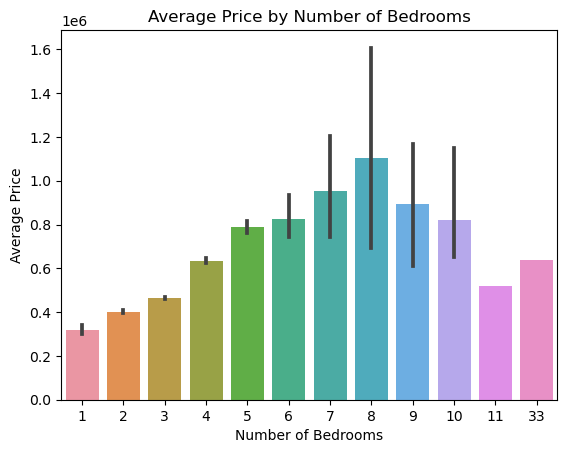

In [38]:
import seaborn as sns

sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

Justification:
- The bar plot allows us to compare the average price of houses with different numbers of bedrooms, which are categorical variables. It provides a visual comparison between the categories and allows us to identify any variations or trends in house prices based on the number of bedrooms.


#Heat Map

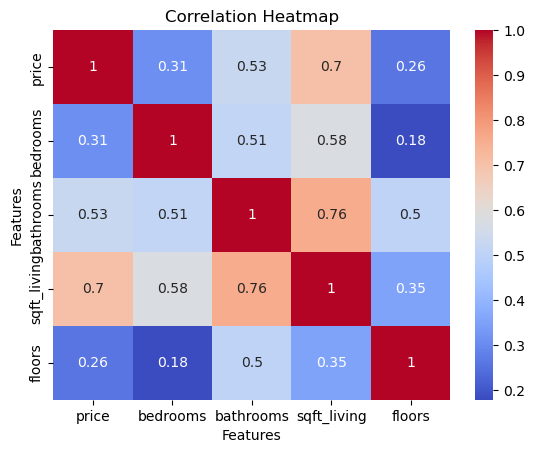

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant numerical columns for the heatmap
numeric_columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Creating a correlation matrix
corr_matrix = df[numeric_columns].corr()

# Generating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Setting the title and axis labels
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Displaying the heatmap
plt.show()